In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize as opt
import math
import timeit

In [540]:
def f_1(x):
    return np.power(x, 3)

def f_2(x):
    return np.abs(x-0.2)

def f_3(x):
    return np.multiply(x, np.sin(1/x))

In [541]:
eps = 0.0001

In [542]:
def exhaustive_search(f, a, b):
    n = (b-a)/eps
    f_min = f(a)
    count = 1
    x_min = a
    for i in range(int(n)):
        f_new = f(a + i*(b-a)/n)
        count += 1
        if f_new < f_min:
            f_min = f_new
            x_min = a + i*(b-a)/n
    
    return x_min, count, int(n)

In [543]:
def dichotomy(f, a, b):
    beta = eps/2
    count = 0
    iterations = 0
    while np.abs(a-b) > eps:
        iterations +=1
        x_1 = (a + b - beta)/2
        x_2 = (a + b + beta)/2
        count += 2
        
        if f(x_1) <= f(x_2):
            b = x_2
        else:
            a = x_1
    
    return (a+b) / 2, count, int(iterations)

In [544]:
invphi = (math.sqrt(5) - 1) / 2 
invphi2 = (3 - math.sqrt(5)) / 2 

def golden_section_search(f, a, b):
    count = 0
    (a, b) = (min(a, b), max(a, b))
    h = b - a

    # Required steps to achieve eps
    n = int(math.ceil(math.log(eps / h) / math.log(invphi)))

    c = a + invphi2 * h
    d = a + invphi * h
    yc = f(c)
    yd = f(d)
    count = 2
    for k in range(n-1):
        if yc < yd:
            b = d
            d = c
            yd = yc
            h = invphi * h
            c = a + invphi2 * h
            yc = f(c)
            count += 1
        else:
            a = c
            c = d
            yc = yd
            h = invphi * h
            d = a + invphi * h
            yd = f(d)
            count += 1

    if yc < yd:
        return (a+d)/2, count, n
    else:
        return (c+b)/2, count, n

In [545]:
# exhaustive_search
exhaustive_search(f_1, 0, 1)

(0, 10001, 10000)

In [546]:
exhaustive_search(f_2, 0, 1)

(0.2, 10001, 10000)

In [547]:
exhaustive_search(f_3, 0.01, 1)

(0.2225, 9901, 9900)

In [548]:
# dichotomy
dichotomy(f_1, 0, 1)

(4.0258026123046875e-05, 30, 15)

In [549]:
dichotomy(f_2, 0, 1)

(0.2000119483947754, 30, 15)

In [550]:
dichotomy(f_3, 0.01, 1)

(0.22254341049194337, 30, 15)

In [551]:
# golden section search
golden_section_search(f_1, 0, 1)

(3.305348067594804e-05, 21, 20)

In [552]:
golden_section_search(f_2, 0, 1)

(0.2000198320884056, 21, 20)

In [553]:
golden_section_search(f_3, 0.01, 1)

(0.22253575499749817, 21, 20)

In [513]:
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)
x = np.linspace(0, 1, 101)
y = np.zeros(101)
y_no_noise = np.zeros(101)

In [514]:
for i in range(len(x)):
    y[i] = alpha*x[i] + beta + np.random.normal(0, 1)
    
for i in range(len(x)):
    y_no_noise[i] = alpha*x[i] + beta

In [572]:
def f_linear(a, b, x):
    return a*x + b

def f_rational(a, b, x):
    return a/(1 + b*x)

In [516]:
eps = 0.001

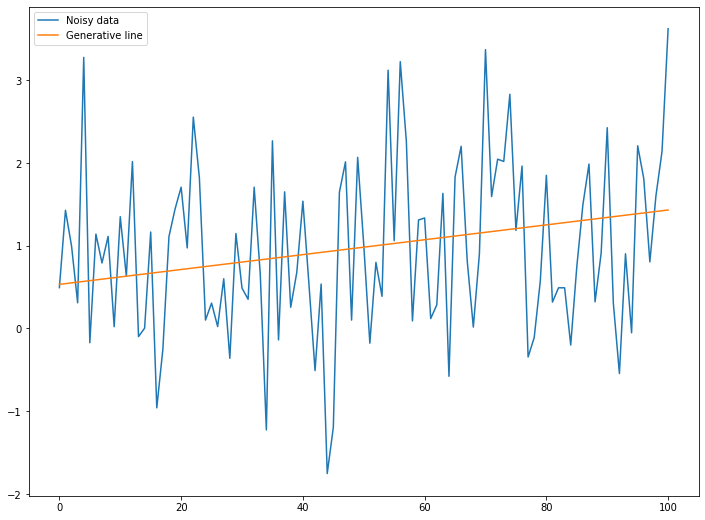

In [557]:
plt.figure(figsize=(12,9))
plt.plot(y, label='Noisy data')
plt.plot(y_no_noise, label='Generative line')
plt.legend()

In [524]:
def least_squares(ab):
    a, b = ab
    global x, y 
    lst_sqr = [(f_linear(x[i],a,b) - y[i]) ** 2 for i in range(len(x))]       
    return np.sum(lst_sqr)

In [554]:
brute = []
for a in np.linspace(0, 1, 1001):
    for b in np.linspace(0, 1, 1001):
        value = least_squares([a, b])
        brute.append([value, a, b])
    

In [558]:
df = pd.DataFrame(brute).rename(columns={0 : "value", 1 : "alpha", 2 : "beta"})

In [559]:
df

,value,alpha,beta
0,205.513920,0.0,0.000
1,205.406990,0.0,0.001
2,205.300128,0.0,0.002
3,205.193334,0.0,0.003
4,205.086607,0.0,0.004
...,...,...,...
1001996,140.659066,1.0,0.996
1001997,140.720535,1.0,0.997
1001998,140.782073,1.0,0.998
1001999,140.843677,1.0,0.999


In [560]:
df.sort_values(by='value').head(1).values[0]

array([109.81053751,   0.66      ,   0.596     ])

In [555]:
optimize.minimize(least_squares, [1, 1], method='Powell', options={'disp' : True, 'xatol' : 1e-3})

Optimization terminated successfully.
         Current function value: 109.810532
         Iterations: 3
         Function evaluations: 107


C:\Users\rbezaev\AppData\Local\Temp/ipykernel_25572/4111296159.py:1: OptimizeWarning: Unknown solver options: xatol
  optimize.minimize(least_squares, [1, 1], method='Powell', options={'disp' : True, 'xatol' : 1e-3})


   direc: array([[ 0.        ,  1.        ],
       [ 0.15095207, -0.2253016 ]])
     fun: 109.8105316523595
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 3
  status: 0
 success: True
       x: array([0.66009663, 0.59544846])

In [556]:
optimize.minimize(least_squares, [1, 1], method='Nelder-Mead', options={'disp' : True, 'xatol' : 1e-3})

Optimization terminated successfully.
         Current function value: 109.810533
         Iterations: 35
         Function evaluations: 68


 final_simplex: (array([[0.66034213, 0.59509883],
       [0.65978576, 0.5959644 ],
       [0.66025912, 0.59550223]]), array([109.81053321, 109.81053422, 109.8105353 ]))
           fun: 109.81053320643284
       message: 'Optimization terminated successfully.'
          nfev: 68
           nit: 35
        status: 0
       success: True
             x: array([0.66034213, 0.59509883])

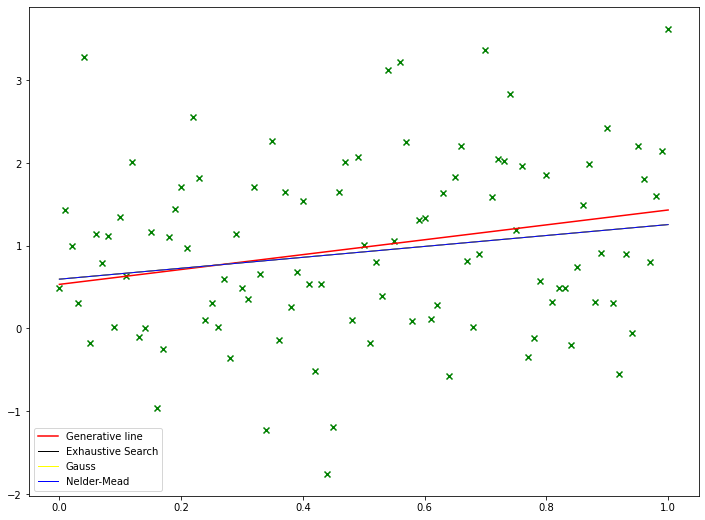

In [562]:
plt.figure(figsize=(12,9))
plt.scatter(x, y, marker="x", color='green')
plt.plot(x, y_no_noise, color='red', label='Generative line')
plt.plot(x, [0.66*x[i] + 0.596 for i in  range(len(x))], label='Exhaustive Search', color='black', linewidth=1)
plt.plot(x, [0.66*x[i] + 0.595 for i in  range(len(x))], label='Gauss', color='yellow', linewidth=1)
plt.plot(x, [0.66*x[i] + 0.595 for i in  range(len(x))], label='Nelder-Mead', color='blue', linewidth=1)
plt.legend()

In [563]:
def least_squares_rational(ab):
    a, b = ab
    global x, y 
    lst_sqr = [(f_rational(x[i],a,b) - y[i]) ** 2 for i in range(len(x))]       
    return np.sum(lst_sqr)

In [564]:
brute_rational = []
for a in np.linspace(0, 1, 1001):
    for b in np.linspace(0, 1, 1001):
        value = least_squares_rational([a, b])
        brute_rational.append([value, a, b])
    

In [565]:
df_rat = pd.DataFrame(brute_rational).rename(columns={0 : "value", 1 : "alpha", 2 : "beta"})

In [566]:
df_rat

,value,alpha,beta
0,132.385164,0.0,0.000
1,132.385164,0.0,0.001
2,132.385164,0.0,0.002
3,132.385164,0.0,0.003
4,132.385164,0.0,0.004
...,...,...,...
1001996,160.417551,1.0,0.996
1001997,160.435882,1.0,0.997
1001998,160.454199,1.0,0.998
1001999,160.472503,1.0,0.999


In [570]:
df_rat.sort_values(by='value').head()

,value,alpha,beta
0,132.385164,0.000,0.0
518518,132.385164,0.518,0.0
711711,132.385164,0.711,0.0
309309,132.385164,0.309,0.0
897897,132.385164,0.897,0.0


In [569]:
optimize.minimize(least_squares_rational, [1, 1], method='Powell', options={'disp' : True, 'xatol' : 1e-3})

Optimization terminated successfully.
         Current function value: 120.976864
         Iterations: 2
         Function evaluations: 70


C:\Users\rbezaev\AppData\Local\Temp/ipykernel_25572/1431567467.py:1: OptimizeWarning: Unknown solver options: xatol
  optimize.minimize(least_squares_rational, [1, 1], method='Powell', options={'disp' : True, 'xatol' : 1e-3})


   direc: array([[1., 0.],
       [0., 1.]])
     fun: 120.97686351101086
 message: 'Optimization terminated successfully.'
    nfev: 70
     nit: 2
  status: 0
 success: True
       x: array([-0.37003164,  0.99276863])

In [568]:
optimize.minimize(least_squares_rational, [1, 1], method='Nelder-Mead', options={'disp' : True, 'xatol' : 1e-3})

Optimization terminated successfully.
         Current function value: 120.976864
         Iterations: 34
         Function evaluations: 64


 final_simplex: (array([[ 1.19649642, -0.30702421],
       [ 1.1969577 , -0.30692202],
       [ 1.19584814, -0.30720916]]), array([120.97686351, 120.97686357, 120.97686359]))
           fun: 120.9768635122692
       message: 'Optimization terminated successfully.'
          nfev: 64
           nit: 34
        status: 0
       success: True
             x: array([ 1.19649642, -0.30702421])

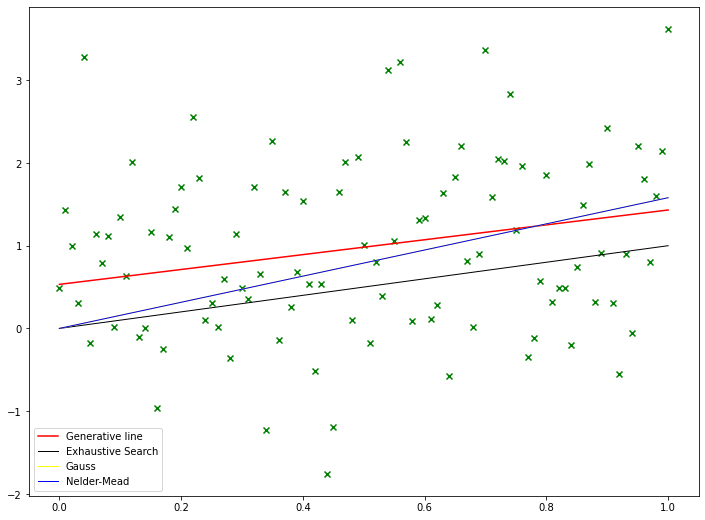

In [574]:
plt.figure(figsize=(12,9))
plt.scatter(x, y, marker="x", color='green')
plt.plot(x, y_no_noise, color='red', label='Generative line')
plt.plot(x, [f_rational(x[i], 0.518, 0) for i in  range(len(x))], label='Exhaustive Search', color='black', linewidth=1)
plt.plot(x, [f_rational(x[i], -0.37, 0.992)  for i in  range(len(x))], label='Gauss', color='yellow', linewidth=1)
plt.plot(x, [f_rational(x[i], 1.196, -0.307) for i in  range(len(x))], label='Nelder-Mead', color='blue', linewidth=1)
plt.legend()